In [1]:
# 设置工作路径
import os
os.chdir("C:\\Users\\Zhu\\Python\\SHAP")

# 获取并打印当前工作路径
current_path = os.getcwd()
print("当前工作路径:", current_path)

当前工作路径: C:\Users\Zhu\Python\SHAP


In [2]:
# 导入pandas库，用于数据操作和分析
import pandas as pd

# 导入numpy库，用于数值计算
import numpy as np

# 导入StandardScaler类，用于数据标准化
from sklearn.preprocessing import StandardScaler

# 导入train_test_split函数，用于将数据集分割成训练集和测试集
from sklearn.model_selection import train_test_split

# 导入LogisticRegressionCV类，用于逻辑回归模型的交叉验证
from sklearn.linear_model import LogisticRegressionCV

# 导入分类报告和混淆矩阵的相关函数，用于评估模型表现
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# 导入matplotlib.pyplot模块，用于数据可视化
import matplotlib.pyplot as plt

In [3]:
# 读保存的插补数据
df_imputed = pd.read_csv('9.28data.csv')

# 删除包含缺失值的行
df_cleaned = df_imputed.dropna()

# 如果你想删除包含缺失值的列，可以这样做：
# df_cleaned = df_imputed.dropna(axis=1)

# 打印数据以确认缺失值已被删除
print(df_cleaned)
df_imputed = df_cleaned

      Gender  Age  Race  Weight  Height    BMI  Retinopathy  HCV  DM  group
0          2   44     4    75.2   156.0  30.90            0    0   0      0
1          1   70     3    69.5   167.6  24.74            0    0   1      1
2          1   73     3   101.9   182.4  30.63            0    0   0      1
3          1   79     3    85.0   171.4  28.93            0    0   0      1
4          2   59     4    82.9   167.6  29.51            0    0   1      0
...      ...  ...   ...     ...     ...    ...          ...  ...  ..    ...
5359       1   48     3    90.6   173.9  29.96            0    0   0      0
5360       1   61     1    89.4   172.4  30.08            0    0   0      0
5361       2   50     3    72.2   159.7  28.31            0    0   0      1
5362       2   60     4    79.1   158.4  31.53            0    0   0      0
5363       1   72     3    85.2   162.5  32.27            0    0   0      1

[5364 rows x 10 columns]


In [4]:
#### 得到一个仅包含选择特征的数据框，并且这些特征列的名称已被重命名为更易理解的特征名称
# 选择的特征映射到原始数据中的列名
feature_selected = {
    'Gender':'Gender',  # 性别
    'Age':'Age',  # 家庭收入与贫困比
    'Race':'Race',  # 身体质量指数（BMI）
    'Weight':'Weight',  # 是否有糖尿病
    'Height':'Height',  # 父母骨质疏松和骨折史
    'BMI':'BMI',  # 总胆固醇
    'Retinopathy':'Retinopathy',  # 单核细胞百分比
    'HCV':'HCV',  # 分段中性粒细胞百分比
    'T2DM':'DM',  # 平均细胞体积
    #'INR':'INR',  # 红细胞分布宽度
    #'TIPS with VE':'TIPS.VE',  # 糖化血红蛋白
    #'Bracket type':'Bracket.T',  # 碱性磷酸酶（ALP）
}

# 提取特征的名称列表
features = list(feature_selected.keys())

# 从原始数据集中提取选择的特征列
df_sl = df_imputed[feature_selected.values()]

# 重命名提取的数据框的列，以便使用更易理解的特征名称
df_sl.columns = features

# 显示包含选定特征的数据框
df_sl

,Gender,Age,Race,Weight,Height,BMI,Retinopathy,HCV,T2DM
0,2,44,4,75.2,156.0,30.90,0,0,0
1,1,70,3,69.5,167.6,24.74,0,0,1
2,1,73,3,101.9,182.4,30.63,0,0,0
3,1,79,3,85.0,171.4,28.93,0,0,0
4,2,59,4,82.9,167.6,29.51,0,0,1
...,...,...,...,...,...,...,...,...,...
5359,1,48,3,90.6,173.9,29.96,0,0,0
5360,1,61,1,89.4,172.4,30.08,0,0,0
5361,2,50,3,72.2,159.7,28.31,0,0,0
5362,2,60,4,79.1,158.4,31.53,0,0,0


In [5]:
# 特征缩放
X_scaled = StandardScaler().fit_transform(df_sl)  # 使用标准化工具对特征进行标准化处理，使其均值为0，标准差为1

# 提取目标变量 'BMD_status'，表示骨密度状态
y = df_imputed['group']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, random_state=123)  
# 将数据集划分为训练集和测试集，70%为训练集，30%为测试集，random_state设定随机种子保证结果可重复

# 定义标签到数值的映射
label_to_num = {'No/mild hepatic \n fibrosis': 0.0, 'Significant liver \n fibrosis/cirrhosis': 1.0}  # 'normal_bmd' 映射到 0.0，'low_bmd' 映射到 1.0

In [9]:
### 将区分的数据集保存到文件夹中
import pandas as pd
from sklearn.model_selection import train_test_split

# 提取目标变量 'BMD_status'，表示骨密度状态
y = df_imputed['group']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(df_sl, y, train_size=0.7, random_state=123)  
# 将数据集划分为训练集和测试集，70%为训练集，30%为测试集，random_state设定随机种子保证结果可重复

# 定义标签到数值的映射
label_to_num = {'No/mild hepatic fibrosis': 0.0, 'Significant liver fibrosis/cirrhosis': 1.0}  # 'normal_bmd' 映射到 0.0，'low_bmd' 映射到 1.0

# 导出为 CSV 文件
df_train.to_csv('train_data.csv', index=False)  # 保存训练集为 CSV 文件
df_test.to_csv('test_data.csv', index=False)    # 保存测试集为 CSV 文件

In [6]:
# 训练模型
# 初始化并训练逻辑回归模型，使用交叉验证来选择最佳正则化参数
lr = LogisticRegressionCV(cv=10, random_state=123, n_jobs=-1).fit(X_train, y_train)  
# cv=10 表示使用10折交叉验证来选择最佳的正则化参数
# random_state=0 确保结果可重复
# n_jobs=-1 表示使用所有可用的CPU核心来加速计算

#### 通过这段代码，逻辑回归模型不仅得到了训练，而且通过交叉验证找到了最佳的正则化参数，
#### 从而提高了模型的泛化能力

In [7]:
#### 使用训练好的模型对测试集进行预测
y_pred = lr.predict(X_test)

# 定义类别名称
target_names = ['No/mild hepatic \n fibrosis', 'Significant liver \n fibrosis/cirrhosis']  # 类别名称，'normal_bmd' 代表正常骨密度，'low_bmd' 代表低骨密度

# 生成分类报告，包含精确度、召回率、F1分数等指标
class_rep = classification_report(y_test, y_pred, target_names=target_names)

# 打印分类报告
print(class_rep)

                                        precision    recall  f1-score   support

            No/mild hepatic 
 fibrosis       0.82      0.85      0.83       977
Significant liver 
 fibrosis/cirrhosis       0.75      0.71      0.73       633

                              accuracy                           0.79      1610
                             macro avg       0.78      0.78      0.78      1610
                          weighted avg       0.79      0.79      0.79      1610



<Figure size 9600x7200 with 0 Axes>

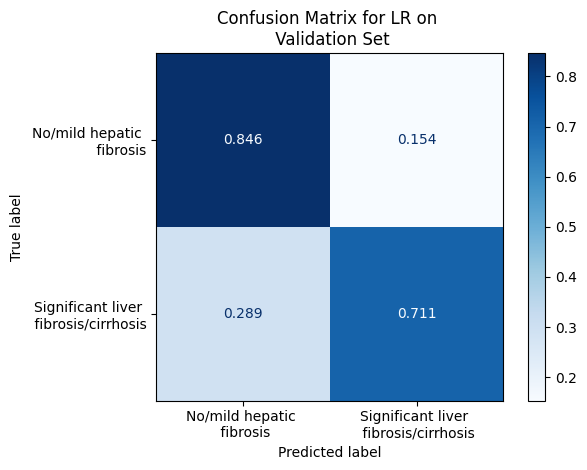

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 计算并绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred, normalize='true')

# 生成混淆矩阵图的对象，指定混淆矩阵和标签名称
dis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

# 创建图形，设置图形的大小和分辨率
plt.figure(figsize=(8, 6), dpi=1200)  # 设置分辨率为1200dpi

# 绘制混淆矩阵图，使用蓝色渐变色，并设置值的格式
dis.plot(cmap=plt.cm.Blues, values_format='.3f')

# 设置图形标题
plt.title('Confusion Matrix for LR on \n Validation Set')

# 设置 y 轴标签
plt.ylabel('True label')

# 自动调整图形布局
plt.tight_layout()

# 保存图形为PDF文件
plt.savefig('confusion_matrix_lr_validation_set.pdf')  # 保存为PDF文件

# 显示图形
plt.show()

In [14]:
### 在训练集上绘制混淆矩阵
y_train_pred = lr.predict(X_train)

# 定义类别名称
target_names = ['No/mild hepatic \n fibrosis', 'Significant liver \n fibrosis/cirrhosis']  # 类别名称，'normal_bmd' 代表正常骨密度，'low_bmd' 代表低骨密度

# 生成分类报告，包含精确度、召回率、F1分数等指标
class_rep_Train = classification_report(y_train, y_train_pred, target_names=target_names)

# 打印分类报告
print(class_rep_Train)

                                        precision    recall  f1-score   support

            No/mild hepatic 
 fibrosis       0.81      0.85      0.83      2271
Significant liver 
 fibrosis/cirrhosis       0.75      0.69      0.72      1483

                              accuracy                           0.79      3754
                             macro avg       0.78      0.77      0.77      3754
                          weighted avg       0.78      0.79      0.78      3754



<Figure size 9600x7200 with 0 Axes>

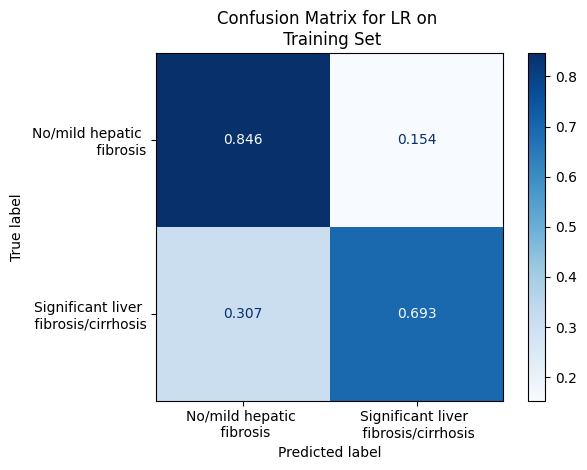

In [15]:
# 计算混淆矩阵
cm_train = confusion_matrix(y_train, y_train_pred, normalize='true')

# 生成混淆矩阵图的对象
dis_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=target_names)

# 绘制和保存混淆矩阵图
plt.figure(figsize=(8, 6), dpi=1200)
dis_train.plot(cmap=plt.cm.Blues, values_format='.3f')
plt.title('Confusion Matrix for LR on \n Training Set')
plt.ylabel('True label')
plt.tight_layout()
plt.savefig('confusion_matrix_lr_training_set.pdf')
plt.show()

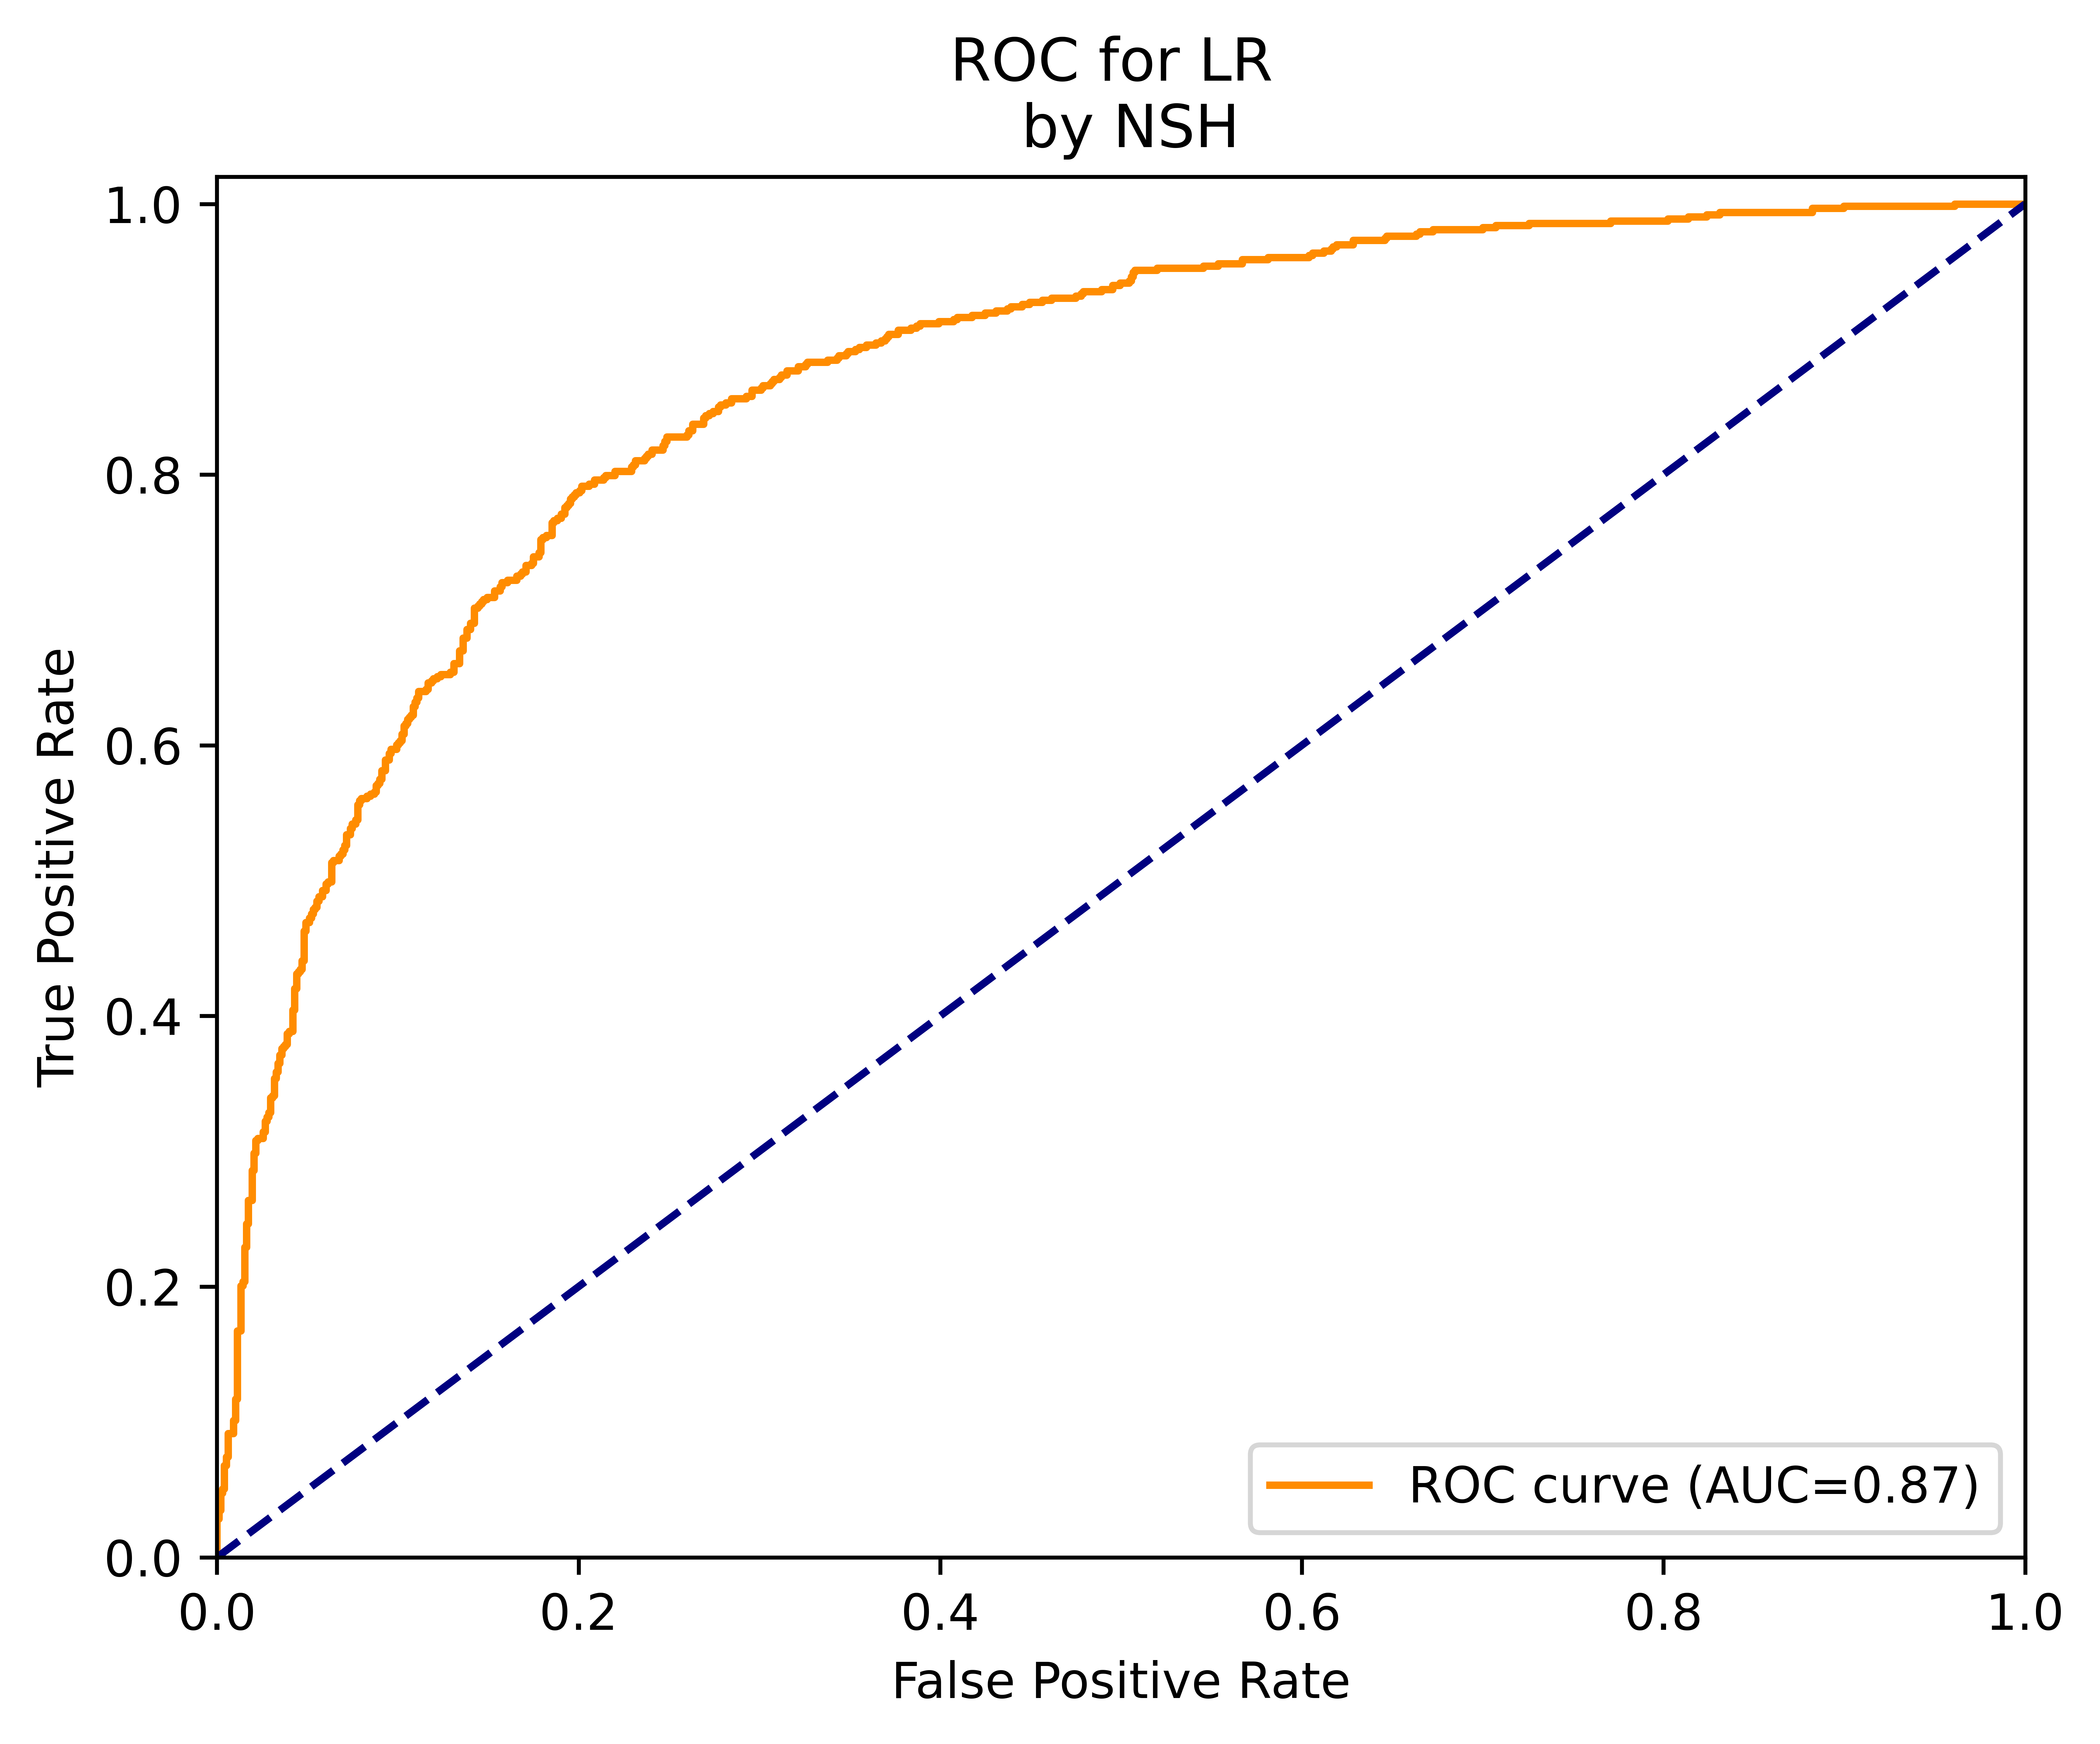

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 计算预测概率，获取阳性类别的概率
y_pred_prob = lr.predict_proba(X_test)[:,1]

# 计算 ROC 曲线的假阳性率（fpr）和真正率（tpr）
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# 计算 ROC 曲线下面积（AUC）
auc = roc_auc_score(y_test, y_pred_prob)

# 创建图形，设置图形的大小和分辨率
plt.figure(figsize=(6, 5), dpi=1200)  # 设置分辨率为1200dpi

# 绘制 ROC 曲线，指定颜色和标签，并显示 AUC 值
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC={auc:.2f})')

# 绘制对角线（随机猜测的参考线）
plt.plot([0.0, 1.0], [0.0, 1.0], linestyle='--', color='navy')

# 设置 x 轴和 y 轴的范围
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.02)

# 设置 x 轴和 y 轴的标签及字体大小
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)

# 设置图形标题
plt.title('ROC for LR \n by NSH')

# 显示图例，位置设置在右下角
plt.legend(loc='lower right')

# 自动调整图形布局
plt.tight_layout()

# 保存图形为PDF文件
plt.savefig('roc_curve_lr_by_nsh.pdf')  # 保存为PDF文件

# 显示图形
plt.show()

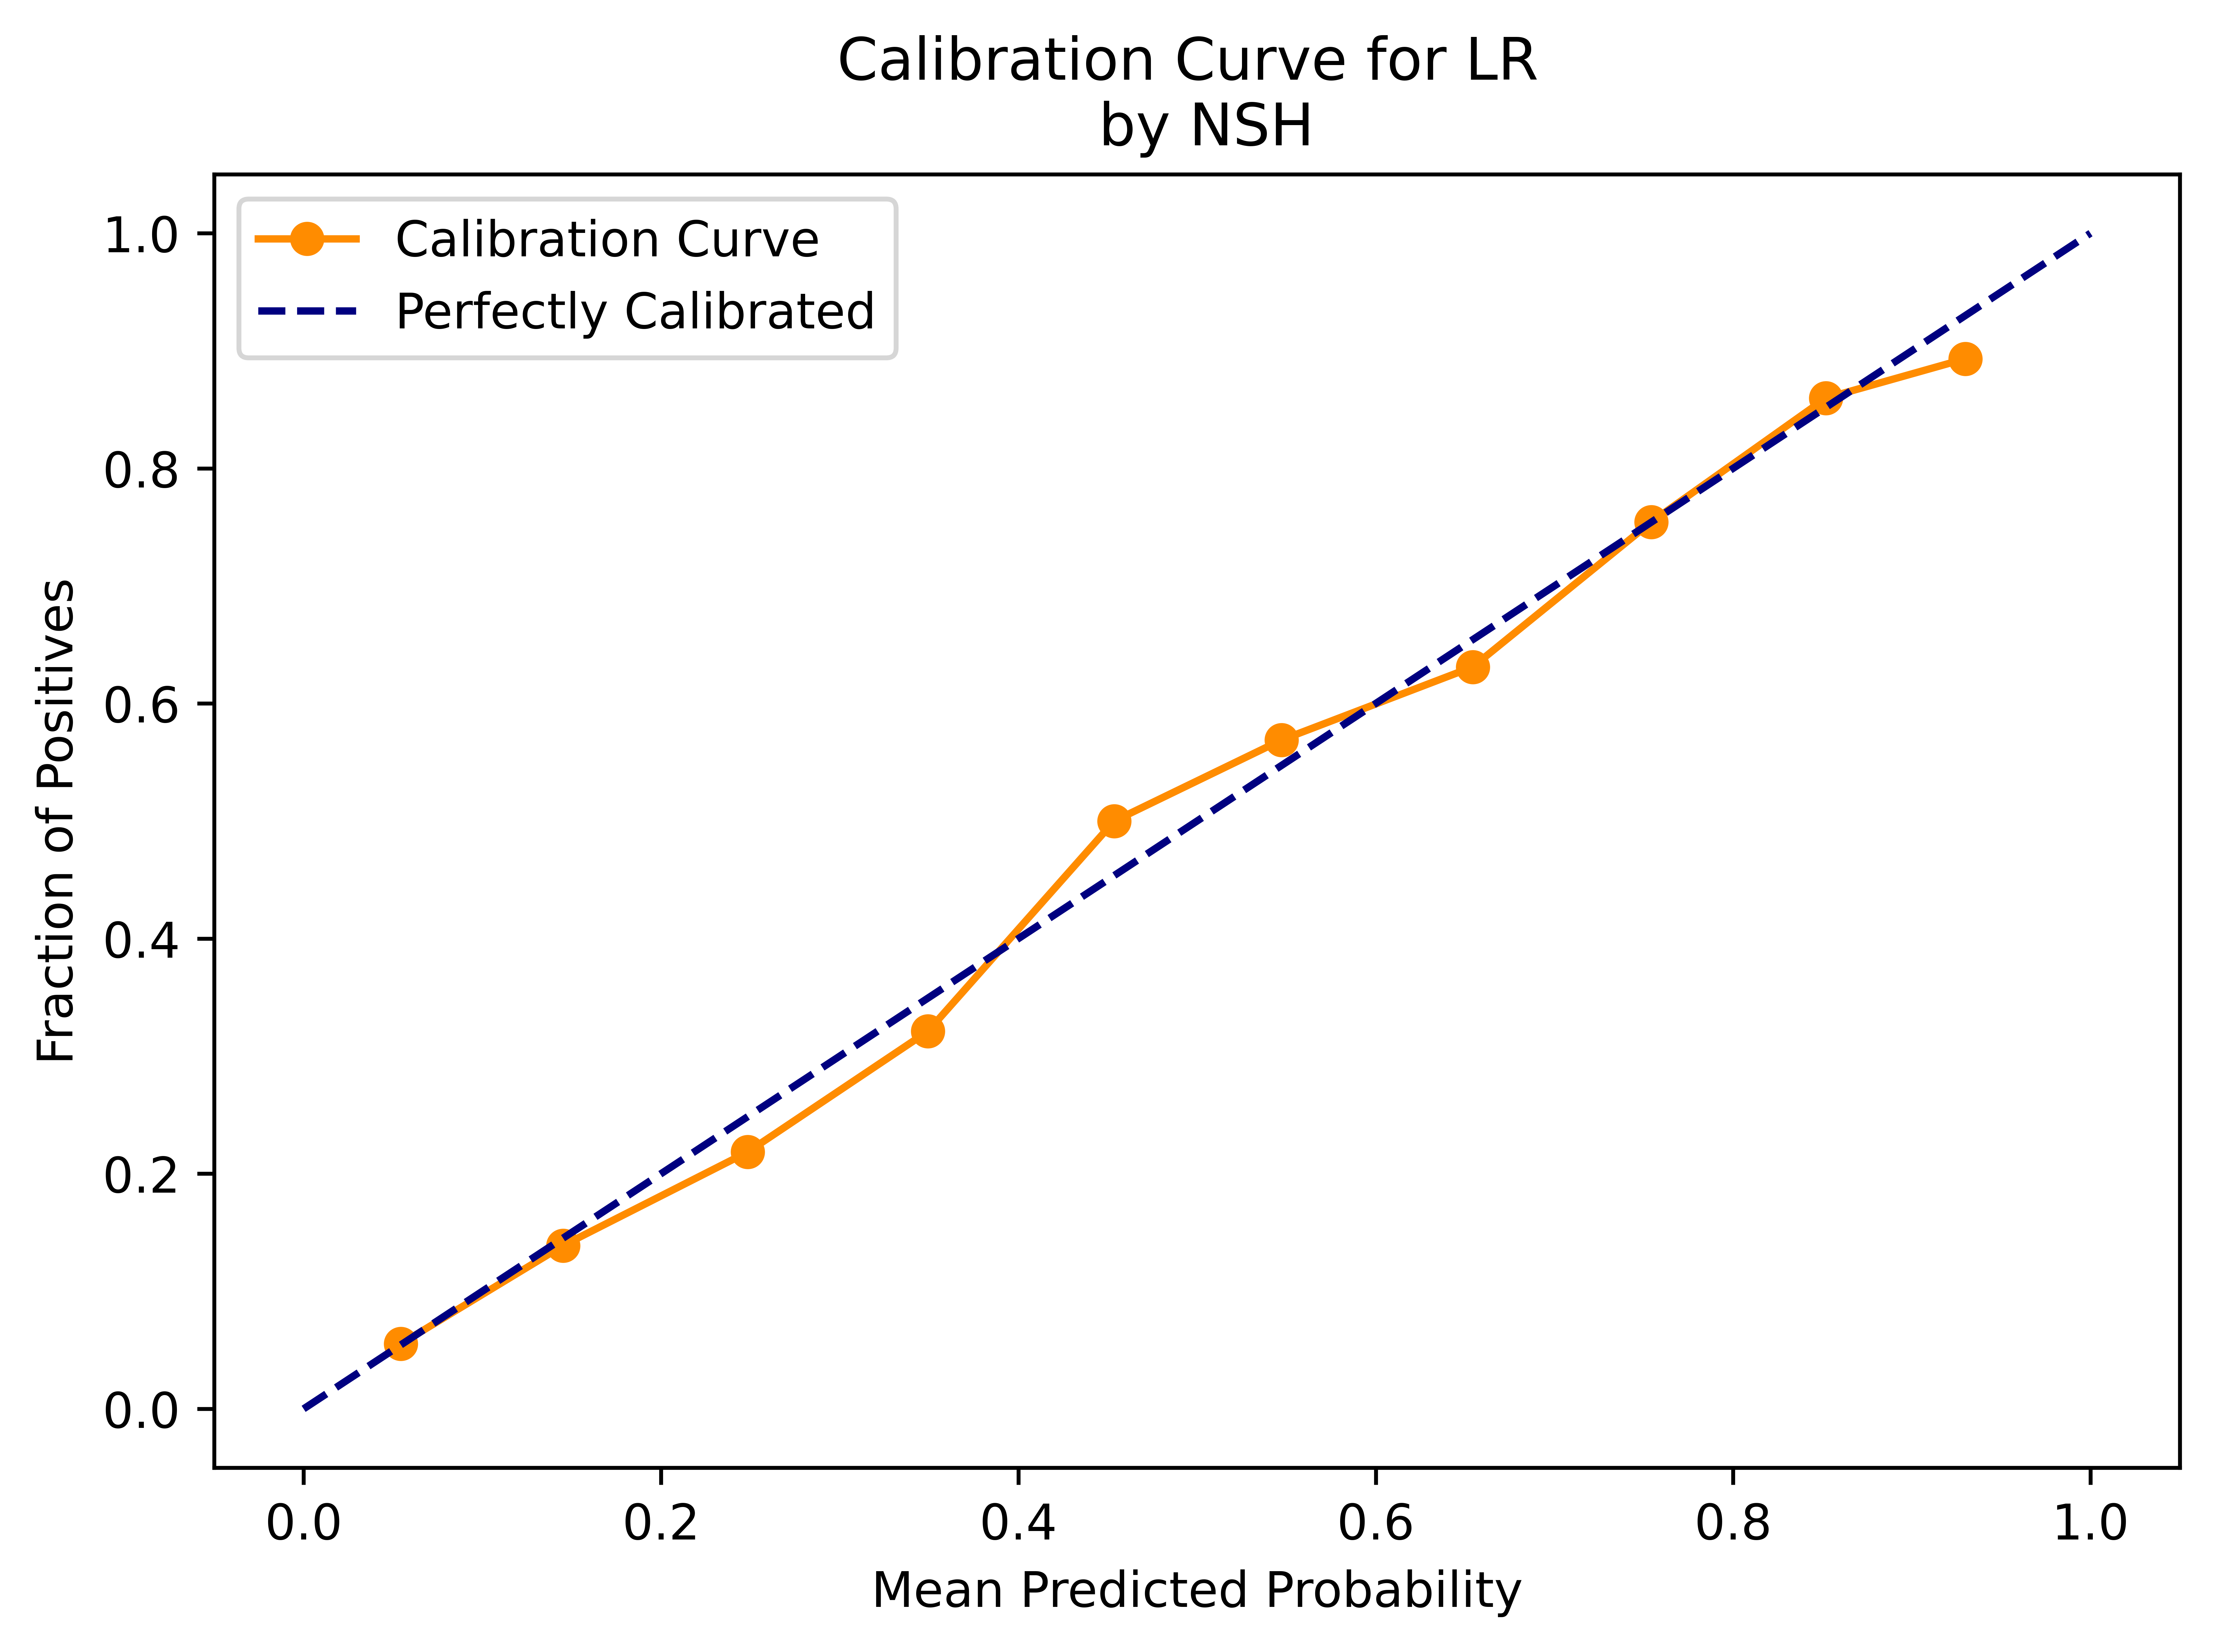

In [27]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# 计算校准曲线的真实标签和预测概率
prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10, strategy='uniform')

# 设置绘图分辨率为1200 DPI
plt.figure(dpi=1200)

# 绘制校准曲线
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', color='darkorange', label='Calibration Curve')

# 绘制完全校准线（对角线）
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Perfectly Calibrated')

# 设置图形的标签和标题
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve for LR \n by NSH')
plt.legend(loc='best')

# 自动调整图形布局
plt.tight_layout()

# 保存图形为PDF文件
plt.savefig('calibration_curve_lr_by_nsh.pdf')

# 显示图形
plt.show()


In [8]:
import shap  # 导入 SHAP 库，用于模型解释

# 将测试数据集转换为 DataFrame 格式，列名为特征名称
X_test_df = pd.DataFrame(X_test, columns=feature_selected.keys())

# 显示转换后的 DataFrame
X_test_df

,Gender,Age,Race,Weight,Height,BMI,Retinopathy,HCV,T2DM
0,1.004110,0.926696,0.125746,1.021031,-1.239210,2.100126,2.658226,-0.165497,-0.507621
1,-0.995907,1.491294,0.125746,-0.298192,-0.481125,-0.067753,-0.376191,-0.165497,1.969975
2,-0.995907,0.362099,2.109577,0.763138,1.064970,0.234634,-0.376191,-0.165497,-0.507621
3,-0.995907,0.442755,-1.858084,-0.139489,-0.122032,-0.080159,-0.376191,-0.165497,1.969975
4,-0.995907,-0.525126,1.117661,4.046319,1.394138,3.185616,2.658226,-0.165497,1.969975
...,...,...,...,...,...,...,...,...,...
1605,1.004110,0.846039,0.125746,-1.180981,-0.511049,-1.100519,-0.376191,-0.165497,-0.507621
1606,1.004110,-1.089724,0.125746,-0.298192,-0.680621,0.043897,-0.376191,-0.165497,-0.507621
1607,1.004110,0.765383,-1.858084,0.331662,-0.790344,0.882826,-0.376191,-0.165497,-0.507621
1608,1.004110,-0.847754,0.125746,1.422750,-0.650696,2.107879,2.658226,-0.165497,1.969975


In [9]:
#### 使用训练好的逻辑回归模型 lr 和测试数据 X_test_df，创建一个 SHAP 解释器实例 explainer。
#### 这里使用 shap.explainers.Linear 来解释线性模型（逻辑回归）
# 创建一个 SHAP 解释器，使用训练好的逻辑回归模型 lr 和测试数据 X_test_df
explainer = shap.explainers.Linear(lr, X_test_df)

# 计算测试数据的 SHAP 值
shap_values = explainer(X_test_df)

In [16]:
# 解决中文不显示问题
# from matplotlib.font_manager import FontProperties
# font = FontProperties(fname='simsun.ttc',size=10) # fname更改本地字体路径

In [22]:
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

# 使用定义的字体属性
# plt.yticks(fontproperties=font, fontsize=10)

NameError: name 'font' is not defined

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

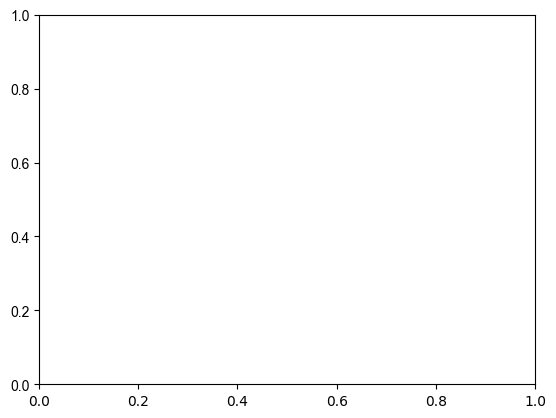

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置字体为Arial，大小为10
plt.yticks(fontname='Arial', fontsize=10)

In [16]:
import matplotlib.pyplot as plt
import shap

# 创建一个新的图形，并设置图像大小
fig = plt.figure(figsize=(8, 6), dpi=1200)  # 调整大小，可以根据需要修改

# 设置图表标题
plt.title("Beeswarm Plot for Feature Importance")

# 绘制SHAP值的beeswarm图，显示前20个特征，show=False表示不直接显示图形
shap.plots.beeswarm(shap_values, max_display=20, show=False)

# 设置 y 轴刻度的字体大小
plt.yticks(fontsize=14)

# 调整图形布局以避免标签和标题被遮挡
plt.tight_layout()

# 保存图像为 PDF
fig.savefig('beeswarm_plot_feature_importance.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

# 关闭图形
plt.close(fig)

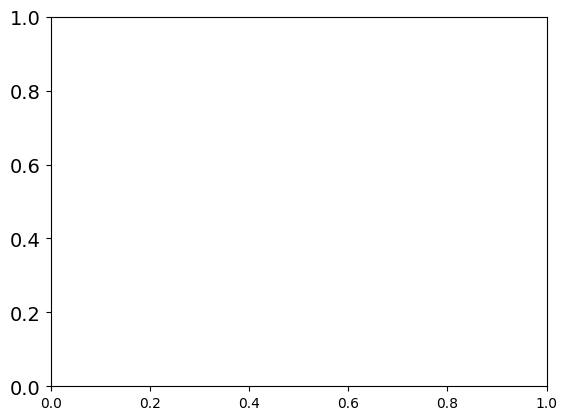

In [21]:
import shap
import matplotlib.pyplot as plt

# 创建一个新的图形，并设置图像大小
fig = plt.figure(figsize=(8, 6), dpi=1200)  # 调整大小，可以根据需要修改

# 设置图表标题
plt.title("Feature Importance")

# 绘制 SHAP 值的条形图
shap.plots.bar(shap_values[:, :, 0], max_display=20, show_data=True)

# 设置 y 轴刻度的字体大小
plt.yticks(fontsize=14)

# 保存图像为PDF
fig.savefig("feature_importance.pdf", format="pdf", bbox_inches='tight', pad_inches=0.1)

# 关闭图形
plt.close(fig)

In [35]:
import matplotlib.pyplot as plt
import shap

# 设置绘图分辨率为1200 DPI
plt.figure(dpi=1200)

# 设置图表标题
plt.title("Heatmap")

# 设置y轴刻度的字体属性
# plt.yticks(fontproperties=font)

# 绘制SHAP值的热图，显示前20个特征
shap.plots.heatmap(shap_values, max_display=20, show=False)

# 设置 y 轴刻度的字体大小
plt.yticks(fontsize=14)

# 调整图形布局以避免标签和标题被遮挡
plt.tight_layout()

# 保存图形为PDF文件
plt.savefig('shap_heatmap.pdf', format='pdf')  # 保存为PDF文件

# 关闭当前显示的图形
plt.close()

# 如果不使用 Agg 后端，则显示绘制的图形
# plt.show()

In [37]:
#### 生成并保存 SHAP 瀑布图，展示真阴性样本的 SHAP 值和特征贡献
import matplotlib.pyplot as plt
import shap

# 设置绘图分辨率为1200 DPI
plt.figure(dpi=1200)

# 设置y轴刻度的字体属性
# plt.yticks(fontproperties=font)

# 绘制第一个样本的SHAP瀑布图
shap.plots.waterfall(shap_values[367], show=False)

# 设置 y 轴刻度的字体大小
plt.yticks(fontsize=14)

# 调整图形布局以避免标签和标题被遮挡
plt.tight_layout()

# 保存图形为PDF文件
plt.savefig('shap_waterfall.pdf')  # 保存为PDF文件

# 显示绘制的图形
# plt.show()

In [38]:
#### 生成并保存 SHAP 瀑布图，展示真阳性样本的 SHAP 值和特征贡献
import matplotlib.pyplot as plt
import shap

# 设置绘图分辨率为1200 DPI
plt.figure(dpi=1200)

# 设置y轴刻度的字体属性
# plt.yticks(fontproperties=font)

# 绘制第一个样本的SHAP瀑布图
shap.plots.waterfall(shap_values[1481], show=False)

# 设置 y 轴刻度的字体大小
plt.yticks(fontsize=14)

# 调整图形布局以避免标签和标题被遮挡
plt.tight_layout()

# 保存图形为PDF文件
plt.savefig('shap_waterfall_2.pdf')  # 保存为PDF文件

# 显示绘制的图形
# plt.show()

In [32]:
import matplotlib.pyplot as plt
import shap
import numpy as np

# 假设 shap_values 是 SHAP 值的数组或列表
# 和 X_train 是特征数据的 numpy 数组

# 打印第一个样本的 SHAP 值
print("第一个样本的 SHAP 值:")
print(shap_values[0].values)  # 打印第一个样本的 SHAP 值

# 打印第一个样本的原始数据
print("第一个样本的原始数据:")
print(X_train[0])  # 如果 X_train 是 numpy 数组，用索引 [0] 获取第一个样本的原始数据

第一个样本的 SHAP 值:
[ 6.69494630e-02  1.72778069e-01 -4.78194551e-01  3.41270826e-02
  9.95630493e-02 -8.50902127e-02  3.13969092e-01  5.60690456e-02
  1.44802268e-01  3.27860224e-04  3.40443698e-02  1.22367986e-02]
第一个样本的原始数据:
[ 1.14613639 -0.09010486 -1.20060191 -0.4826143  -0.57122499  0.7372364
  0.091642    0.01488629  0.62631911 -0.12681323 -1.52460732  1.19457243]
